# Pertemuan 1: Materi Klaster

**[TKE1686] MK Machine Learning (3-SKS)**

oleh: Gramandha Wega Intyanto, S.ST., M.T.

## Algoritma Klaster yang akan di pelajari
1. K-Means
2. Hirarki Klaster
3. DBSCAN

![gambar 1](assets/metode_cluster.png)

# K-Means
Algoritma K-means adalah salah satu algoritma clustering yang bersifat iteratif yang mencoba untuk mempartisi
dataset menjadi subkelompok non-overlapping berbeda yang ditentukan oleh K (cluster) di mana setiap titik data
hanya dimiliki oleh satu kelompok.

K-Means mencoba membuat titik data intra-cluster semirip mungkin sambil dengan titik data yang lain pada satu
cluster. **K-Means menetapkan poin data ke cluster sedemikian rupa sehingga jumlah jarak kuadrat antara titik data dan pusat massa cluster (rata-rata aritmatika dari semua titik data yang termasuk dalam cluster itu) minimal.**
**Semakin sedikit variasi** yang kita miliki dalam cluster, **semakin homogen (serupa)** titik data dalam cluster yang
sama.

## Langkah-Langkah K-Means
1. Memilih jumlah cluster awal (K) yang ingin dibuat

![gambar 1](assets/data_random.png)
   

2. Memilih titik secara random sebanyak K buah, di mana titik ini akan menjadi pusat (centroid) dari masing-masing kelompok (clusters).

![gambar 2](assets/centorid.png)

3. Dari dataset yang kita miliki, buat dataset yang terdekat dengan titik centroid sebagai bagian dari cluster tersebut. Sehingga secara total akan terbentuk clusters sebanyak K buah.
   
![gambar 3](assets/klaster.png)

4. Lakukan kalkulasi, dan tempatkan pusat centroid yang baru untuk setiap cluster-nya. Langkah ini dilakukan untuk menemukan centroid yang paling tepat untuk maisng-masing klaster.

![gambar 4](assets/centroid_geser.png)


5. Dari dataset yang kita miliki ambil titik centroid terdekat, sehingga dataset tadi menjadi bagian
dari cluster tersebut. Jika masih ada data yang berubah kelompok (pindah cluster), kembali ke langkah 

6. Jika tidak, maka cluster yang terbentuk sudah baik.

<video width="320" height="240" controls>
  <source src="https://www.youtube.com/watch?v=6QV4vPpDxKQ&t=50s" type="video/mp4">
</video>

![gambar 4](assets/k-means.gif)

## Penetuan ngukuran jarak bisa menggunakan beberapa metode, seperti contohnya:
   - Ecluidean Distance : Jarak dihitung sebagai **panjang garis lurus** antara dua titik dalam ruang Euclidean. Ini adalah bentuk jarak yang paling umum digunakan dalam analisis data dan pembelajaran mesin.

     Formula Euclidean Distance untuk dua titik $(x_1, y_1)$ dan $(x_2, y_2)$ :
            $d_{\text{Euclidean}}(x, y) = \sqrt{\sum_{i=1}^{n} (x_i - y_i)^2}$
                 
   - Manhattan Distance : Jarak dihitung sebagai jumlah selisih absolut antara koordinat titik data dan centroid.

     Formula Manhattan Distance untuk dua titik $(x_1, y_1)$ dan $(x_2, y_2)$ :
            $d_{\text{Manhattan}}(x, c) = \sum_{i=1}^{n} |x_i - y_i|$

   - atau menggunakan metode lain Minkowski, Cosine, Mahalanobis, Chebyshev Distance

## Contoh Program K-Means

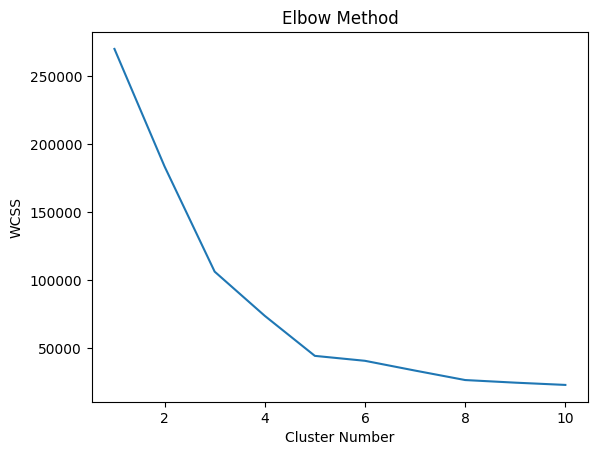

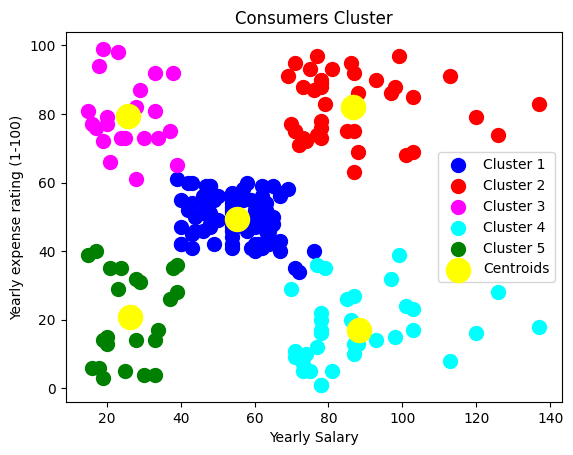

In [19]:
# Mengimpor library
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
 
# Mengimpor dataset
dataset = pd.read_csv('datasets/Customer.csv')
X = dataset.iloc[:, [3, 4]].values
 
# Menggunakan metode elbow untuk menentukan angka cluster yang tepat
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Cluster Number')
plt.ylabel('WCSS')
plt.show()
 
# Menjalankan K-Means Clustering ke dataset
kmeans = KMeans(n_clusters = 5, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X)
 
# Visualisasi hasil clusters
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'blue', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'red', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'magenta', label = 'Cluster 3')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], s = 100, c = 'green', label = 'Cluster 5')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Consumers Cluster')
plt.xlabel('Yearly Salary')
plt.ylabel('Yearly expense rating (1-100)')
plt.legend()
plt.show()

# Hirarki Klaster _(Hirarical Cluster)_
Pengelompokan hierarki adalah Teknik clustering dengan memisahkan data ke dalam kelompok berdasarkan beberapa ukuran
kesamaan, menemukan cara untuk mengukur bagaimana mereka sama dan berbeda, dan selanjutnya mempersempit data.

## Contoh kasus:
Pertama, terdapat empat mobil yang dapat masukkan ke dalam dua kelompok jenis mobil: sedan dan SUV. 
Selanjutnya, HC akan menggabungkan sedan dan SUV. 
Untuk langkah terakhir, yaitu mengelompokkan semuanya ke dalam satu cluster dan selesai ketika kita hanya memiliki satu cluster.

![gambar 5](assets/kelompok_mobil.png)

## Tipe dari Hirarki klaster
1. Divisive: Pengelompokan divisif dikenal sebagai pendekatan top-down, yaitu mengambil cluster besar dan mulai membaginya menjadi
dua, tiga, empat, atau lebih cluster.
2. Agglomerative: Pengelompokan aglomeratif dikenal sebagai pendekatan bottom-up, yaitu pengelompokan dimulai dari cluster kecil menuju satu
cluster besar.

<img src="assets/hirarki.png" alt="gambar 5" width="800" >

## Langkah-langkah metode hierarchical clustering dengan agglomerative:
1. Buat setiap data poin dalam dataset menjadi sebuah cluster, sehi8ngga untuk N data kita memiliki N cluster. Misalnya jika
jumlah row data adalah 500 maka akan terdapat 500 cluster.
2. Cari dua poin/2 cluster yang saling berdekatan untuk digabung menjadi satu cluster sehingga jumlah cluster menjadi lebih
kecil.
3. Cari 2 cluster lagi yang berdekatan dengan yang lain (termasuk dengan kluster yang baru saja dibuat di langkah 2 jika
memang cluster tersebut memiliki jarak terdekat dengan kluster lain), dan jadikan dua cluster terdekat ini menjadi 1 kluster.
Dengan demikian, sekarang kita memiliki N-2 kluster.
4. Langkah ketiga akan diulang terus hingga mendapatkan satu buah cluster besar.

## Menggunakan Dendogram
1. Sama seperti pada contoh hierarchical clustering sebelumnya, terdapat enam titik dalam satu diagram. Grafik yang atas adalah grafik awal dan yang bawah adalah grafik dendogram.

![gambar 5](assets/step1_ha.png)

2. Sama seperti ilustrasi pada hierarchical clustering, langkah pertama adalah menentukan dua titik terdekat kemudian menerjemahkannya ke dalam diagram dendogram.

![gambar 5](assets/step2_ha.png)


4. Mencari lagi dua cluster yang berdekatan untuk digabungkan menjadi satu cluster lagi. Tinggi diagram Dendogram berbeda-beda sesuai dengan hasil penghitungan Euclidean Distancenya.

![gambar 5](assets/step3_ha.png)


6. Proses yang ketiga diulang lagi dengan mencari dua cluster yang terdekat. Jika dua cluster yang digabungkan sebelumnya adalah cluster antara dua titik maka cara menerjemahkan dalam dendogram.
![gambar 5](assets/step4_ha.png)


8. Mengulang proses dengan menggabungkan cluster yang sudah ada, Pada gambar disamping tampak bahwa dua cluster terakhir merupakan gabungan dari cluster (dua titik yang menjadi satu cluster) pada proses awal.

![gambar 5](assets/step5_ha.png)

10. Proses akan berhenti setelah semua cluster telah tergabung menjadi satu cluster besar.

![gambar 5](assets/step6_ha.png)

12. Untuk menentukan berapa jumlah cluster yang paling sesuai pada dats set yang diujikan dapat dianalisa melalui dendogram. Yaitu dengan menentukan garis grafik dendogram yang paling panjang yang tidak terkena potongan atau bisa juga dengan menentukan nilai threshold.

![gambar 5](assets/step7_ha.png)

## Contoh program hirarki klaster

Dataset berhasil dimuat!


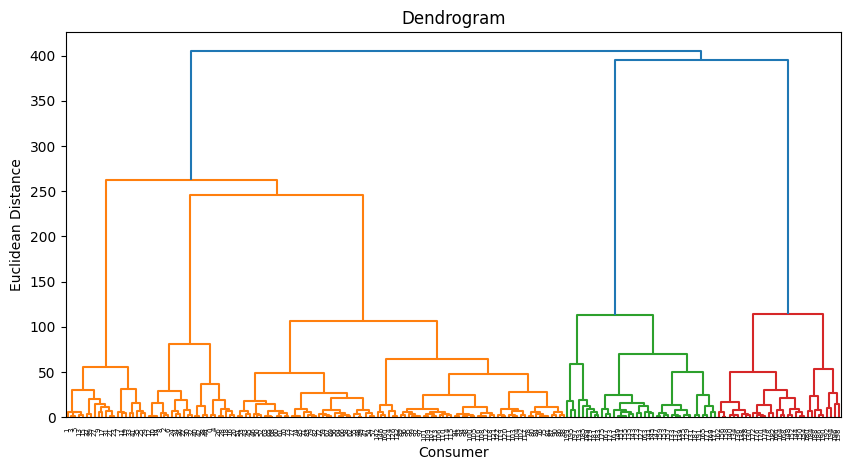

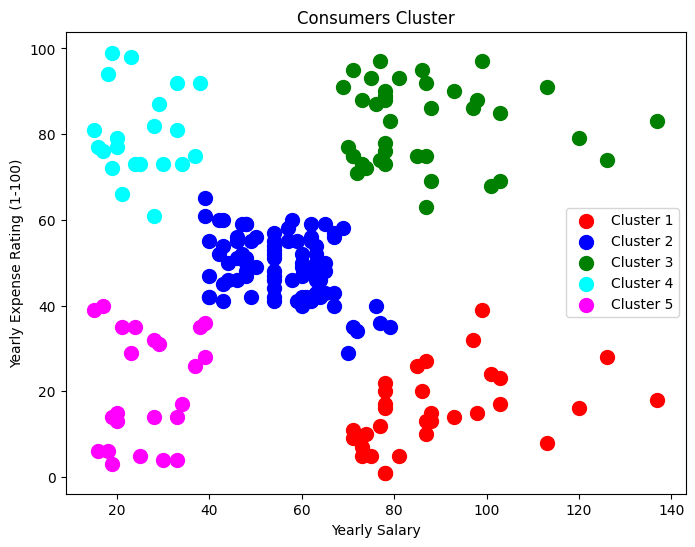

In [1]:
# Mengimpor library
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering

# Mengimpor dataset
try:
    dataset = pd.read_csv('datasets/Customer.csv')
    print("Dataset berhasil dimuat!")
except FileNotFoundError:
    print("Error: File 'Customer.csv' tidak ditemukan. Pastikan file berada di direktori yang benar.")
    exit()

# Pastikan dataset memiliki cukup kolom
if dataset.shape[1] < 5:
    print("Error: Dataset tidak memiliki kolom yang cukup untuk clustering.")
    exit()

# Mengambil fitur yang akan digunakan
X = dataset.iloc[:, [3, 4]].values

# Menampilkan dendrogram untuk menentukan jumlah cluster
plt.figure(figsize=(10, 5))
dendrogram = sch.dendrogram(sch.linkage(X, method='ward'))
plt.title('Dendrogram')
plt.xlabel('Consumer')
plt.ylabel('Euclidean Distance')
plt.show()

# Menjalankan Hierarchical Clustering dengan parameter yang diperbaiki
hc = AgglomerativeClustering(n_clusters=5, metric='euclidean', linkage='ward')
y_hc = hc.fit_predict(X)

# Visualisasi hasil clustering
plt.figure(figsize=(8, 6))
colors = ['red', 'blue', 'green', 'cyan', 'magenta']
labels = ['Cluster 1', 'Cluster 2', 'Cluster 3', 'Cluster 4', 'Cluster 5']

for i in range(5):
    plt.scatter(X[y_hc == i, 0], X[y_hc == i, 1], s=100, c=colors[i], label=labels[i])

plt.title('Consumers Cluster')
plt.xlabel('Yearly Salary')
plt.ylabel('Yearly Expense Rating (1-100)')
plt.legend()
plt.show()


## DBSCAN (Density-Based Spatial Clustering of Applications)
Density-Based Spatial Clustering of Applications with Noise (DBSCAN) adalah
algoritma dasar untuk pengelompokan berbasis density. Algoritma ini dapat
menemukan cluster dengan berbagai bentuk dan ukuran dari sejumlah besar data,
yang mengandung noise dan outlier.

ketika data cluster berbentuk arbiter atau ingin mendeteksi cluster out lier, maka DBSCAN merupaka
Teknik cluster yang sesuai
![gambar 5](assets/DBScan.png)

Algoritma DBSCAN menggunakan dua parameter yaitu:

1. **minPts**: Jumlah minimum titik (ambang batas) yang dikelompokkan bersama agar suatu wilayah dianggap density.
2. **eps (ε)**: Ukuran jarak yang akan digunakan untuk menemukan titik-titik di sekitar titik mana pun.

![Screenshot from 2025-03-19 10-26-33.png](assets/parameter-dbscan.png)

Kedua parameter ini dapat diterapkan dengan baik dengan menggunakan dua konsep yaitu Density Reachability dan Density Connectivity

## Konsep

1. **Reachability** pada konsep ini, untuk menentukan kepadatan dialukan dengan menetapkan suatu titik yang dapat dijangkau dari yang lain jika terletak dalam jarak tertentu (eps) darinya.
2. **Connectivity**, konsep ini melakukan pendekatan chaining berbasis transitivitas untuk menentukan apakah titik terletak di cluster tertentu. Misalnya, titik p dan q dapat dihubungkan jika $p->r->s->t->q$, di mana $x->y$ berarti $x$ berada di sekitar (neighborhood) $y$.

## Langkah-langkah algoritma DBSCAN

1. Algoritma dimulai dengan mengambil titik dalam kumpulan data secara random (sampai semua titik telah dikunjungi).
2. Jika setidaknya ada titik 'minPoint' dalam radius ke titik tersebut, maka dapat dianggap semua titik ini sebagai bagian dari cluster yang sama.
3. Cluster kemudian diperluas dengan mengulangi perhitungan lingkungan secara rekursif untuk setiap titik tetangga.

![gambar 5](assets/dbscan_view.png)
![gambar 5](assets/dbscan.gif)

## Terdapat tiga jenis titik setelah pengelompokan DBSCAN selesai:
1. Core adalah titik yang memiliki setidaknya m titik dalam jarak n dari dirinya sendiri.
2. Border adalah titik yang memiliki setidaknya satu titik Inti pada jarak n.
3. Noise adalah titik yang bukan Core atau Border. Dan ia memiliki kurang dari m titik dalam jarak n
dari dirinya sendiri.

![image.png](assets/titik_dbscan.png)

## Contoh program DBSCAN

Estimated number of clusters: 3
Estimated number of noise points: 20


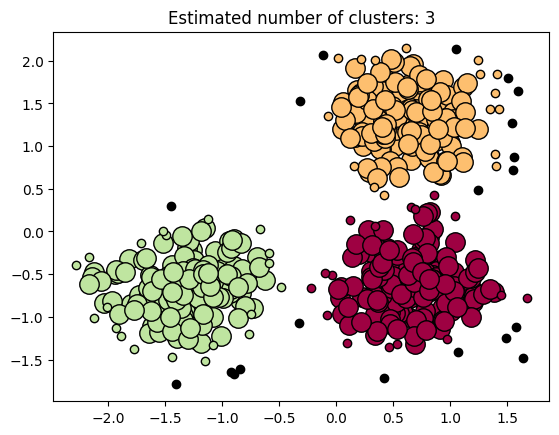

In [7]:
#Penerapan DBSCAN pada cluster spherical data.

import numpy as np
from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler

# Generate sample data
centers = [[1, 1], [-1, -1], [1, -1]]
X, labels_true = make_blobs(n_samples=500, centers=centers, cluster_std=0.4,
                            random_state=0)

X = StandardScaler().fit_transform(X)

# Menghitung DBSCAN
db = DBSCAN(eps=0.3, min_samples=10).fit(X)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of noise points: %d' % n_noise_)
# print("Homogeneity: %0.3f" % metrics.homogeneity_score(labels_true, labels))
# print("Completeness: %0.3f" % metrics.completeness_score(labels_true, labels))
# print("V-measure: %0.3f" % metrics.v_measure_score(labels_true, labels))
# print("Adjusted Rand Index: %0.3f"
#       % metrics.adjusted_rand_score(labels_true, labels))
# print("Adjusted Mutual Information: %0.3f"
#       % metrics.adjusted_mutual_info_score(labels_true, labels))
# print("Silhouette Coefficient: %0.3f"
#       % metrics.silhouette_score(X, labels))

# Plot result
import matplotlib.pyplot as plt


# Black removed and is used for noise instead.
unique_labels = set(labels)
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)

    xy = X[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=14)

    xy = X[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=6)

plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.show()

## Tugas Materi Klaster

Cari dataset yang perlu untuk di klaster atau dari dataset yang Anda punya, silahkan lakukan klaster dari featur yang Anda tentukan, 
kemudian klaster dengan K-mean Klaster, Hirarki Klaster, dan DBscan.